In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# LSTM Model Definition with Dropout to reduce overfitting
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size

        # Define LSTM layer with Dropout
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, dropout=dropout_prob)

        # Define a fully connected layer for output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initializing hidden state and cell state
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # Initial hidden state
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # Initial cell state

        # LSTM forward pass
        out, (hn, cn) = self.lstm(x, (h0, c0))

        # Pass the output of the last timestep to the fully connected layer
        out = self.fc(out[:, -1, :])  # Using the output from the last time step for prediction
        return out

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import torch

def parse_pattern(pattern):
    """
    Parse a pattern string like '1100... 1010...' into input and output vectors.
    """
    try:
        inputs, outputs = pattern.strip().split()
        input_vec = [int(bit) for bit in inputs]
        output_vec = [int(bit) for bit in outputs]
        return input_vec, output_vec
    except ValueError:
        raise ValueError(f"Invalid pattern: {pattern}")

def load_data_from_test_file(file_path, max_len=None):
    """
    Load input-output vectors from a .test file formatted as:
    'N: input_bits output_bits'

    Parameters:
    - file_path (str): Path to the .test file
    - max_len (int, optional): Maximum sequence length to pad/truncate to

    Returns:
    - X (torch.Tensor): Input tensor [num_samples, input_dim]
    - Y (torch.Tensor): Output tensor [num_samples, output_dim]
    """
    input_vectors = []
    output_vectors = []

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or ':' not in line or line.startswith('*'):
                continue  # Skip comments and empty lines

            try:
                # Remove prefix (e.g., '1:') and extract input-output pattern
                pattern = line.split(':', 1)[1].strip()
                input_vec, output_vec = parse_pattern(pattern)

                # Apply optional padding or truncation
                if max_len:
                    input_vec = (input_vec + [0]*max_len)[:max_len]
                    output_vec = (output_vec + [0]*max_len)[:max_len]

                input_vectors.append(input_vec)
                output_vectors.append(output_vec)

            except Exception as e:
                print(f" Failed to parse line: {line}\n   Error: {e}")

    X = torch.tensor(input_vectors, dtype=torch.float32)
    Y = torch.tensor(output_vectors, dtype=torch.float32)

    print("Loaded input shape:", X.shape)
    print("Loaded output shape:", Y.shape)

    return X, Y

# Load data from file
file_path = '/content/drive/My Drive/c1355.test'  # Change this if running locally
data_tensor, target_tensor = load_data_from_test_file(file_path)

# Shape info
print(f" Data tensor shape: {data_tensor.shape}")
print(f" Target tensor shape: {target_tensor.shape}")

# Optional: simulated dummy target (same shape as original target)
# dummy_target = torch.tensor([[1.0, 0.5, 0.2]] * data_tensor.shape[0], dtype=torch.float32)


Loaded input shape: torch.Size([101, 41])
Loaded output shape: torch.Size([101, 32])
 Data tensor shape: torch.Size([101, 41])
 Target tensor shape: torch.Size([101, 32])


In [42]:
# Load data from file
file_path = '/content/drive/My Drive/c1355.test'  # Change this if running locally
data_tensor, target_tensor = load_data_from_test_file(file_path)

# Reshape for LSTM: [batch_size, seq_len, input_size]
data_tensor = data_tensor.unsqueeze(1)

# Shape info
print(f" Data tensor shape (after reshape): {data_tensor.shape}")
print(f" Target tensor shape: {target_tensor.shape}")


Loaded input shape: torch.Size([101, 41])
Loaded output shape: torch.Size([101, 32])
 Data tensor shape (after reshape): torch.Size([101, 1, 41])
 Target tensor shape: torch.Size([101, 32])


In [48]:
# Hyperparameters
input_size = data_tensor.shape[2]  # Number of features per time step
hidden_size = 64  # Reduce hidden size to reduce model complexity
output_size = 3  # Number of outputs (you can adjust this)
num_epochs = 50  # Reduce number of epochs
learning_rate = 0.001  # Learning rate

model = LSTMModel(input_size, hidden_size, output_size = 32, dropout_prob=0.3)

In [52]:
# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    # Forward pass
    outputs = model(data_tensor)  # Pass the data_tensor through the model
    print(f"Outputs shape: {outputs.shape}")  # Check the model's output shape

    # Check the target tensor's shape
    print(f"Target tensor shape: {target_tensor.shape}")

    # Calculate the loss
    loss = criterion(outputs, target_tensor)  # Compare the outputs to the target_tensor

    # Zero the gradients before backpropagation
    optimizer.zero_grad()

    # Backpropagate the loss
    loss.backward()

    # Update the weights
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Epoch [10/50], Loss: 0.1729
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shape: torch.Size([101, 32])
Target tensor shape: torch.Size([101, 32])
Outputs shap

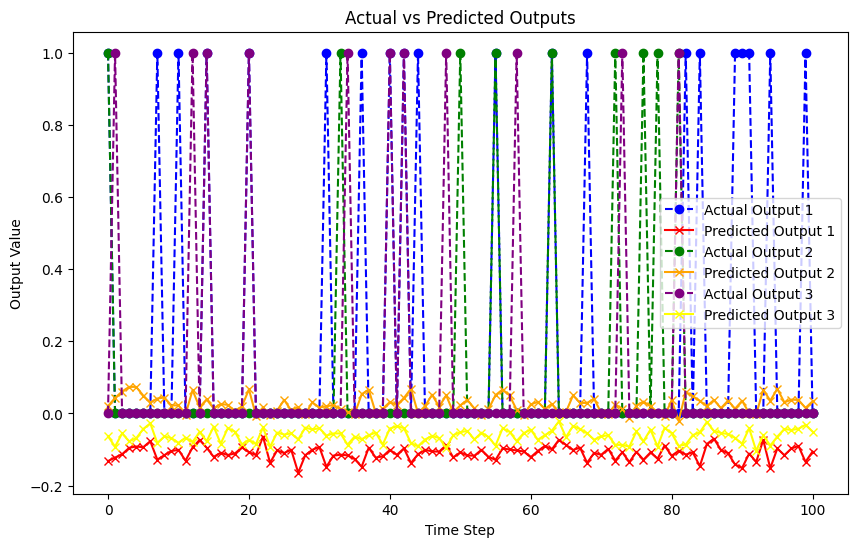

In [53]:
# Ensure target_tensor is 2D before converting to numpy
target_np = target_tensor.numpy()

# Check if target_np is 1D and reshape if necessary
if target_np.ndim == 1:
    target_np = target_np.reshape(-1, 1)

# Make predictions using the trained model
model.eval()
with torch.no_grad():
    predicted_output = model(data_tensor)

# Convert predicted output to numpy
predicted_output_np = predicted_output.numpy()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot the first target output vs predicted output
plt.plot(target_np[:, 0], label='Actual Output 1', color='blue', linestyle='--', marker='o')
plt.plot(predicted_output_np[:, 0], label='Predicted Output 1', color='red', linestyle='-', marker='x')

# Plot the second target output vs predicted output
plt.plot(target_np[:, 1], label='Actual Output 2', color='green', linestyle='--', marker='o')
plt.plot(predicted_output_np[:, 1], label='Predicted Output 2', color='orange', linestyle='-', marker='x')

# Plot the third target output vs predicted output
plt.plot(target_np[:, 2], label='Actual Output 3', color='purple', linestyle='--', marker='o')
plt.plot(predicted_output_np[:, 2], label='Predicted Output 3', color='yellow', linestyle='-', marker='x')

# Add labels and legend
plt.xlabel('Time Step')
plt.ylabel('Output Value')
plt.title('Actual vs Predicted Outputs')
plt.legend()

# Show the plot
plt.show()
